In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv', header=None)
df.head()

,0,1,2,3,4,5
0,8:56 AM,9:00 AM,7:45 AM,7:45 AM,8:05 AM,7:45 AM
1,8:40 AM,8:40 AM,8:30 AM,8:30 AM,8:45 AM,8:20 AM
2,8:45 AM,8:20 AM,8:05 AM,8:00 AM,8:05 AM,8:00 AM
3,8:40 AM,8:40 AM,8:40 AM,8:25 AM,8:40 AM,8:40 AM
4,8:55 AM,8:50 AM,8:55 AM,8:10 AM,8:15 AM,8:05 AM


In [3]:
df.describe()

,0,1,2,3,4,5
count,23,23,23,23,23,23
unique,9,11,15,16,17,13
top,8:45 AM,8:50 AM,9:00 AM,9:00 AM,8:05 AM,8:00 AM
freq,11,5,3,3,2,3


In [4]:
columns = ['Day' + str(x) for x in range(1, 7)]

In [5]:
df.columns = columns

In [6]:
df['Day1'].loc[df['Day1'].str.contains('absent')] = "9:00AM"

In [7]:
times = np.array(df).reshape(23*6, 1)
times = pd.DataFrame(times)

In [8]:
def TimeStringHHMM(x):
    return f'{pd.Timestamp(x):%H:%M}'

times = times.applymap(TimeStringHHMM)

In [9]:
times.head()

,0
0,08:56
1,09:00
2,07:45
3,07:45
4,08:05


In [10]:
times_df = pd.Series(times[0])

In [11]:
time_count = times_df.value_counts().sort_index(ascending=False)

In [12]:
from datetime import datetime

xlabels = time_count.index
print(xlabels)

Index(['11:00', '09:00', '08:58', '08:57', '08:56', '08:55', '08:54', '08:50',
       '08:46', '08:45', '08:42', '08:41', '08:40', '08:39', '08:38', '08:37',
       '08:35', '08:34', '08:32', '08:31', '08:30', '08:27', '08:25', '08:20',
       '08:15', '08:13', '08:12', '08:10', '08:05', '08:00', '07:45', '07:30'],
      dtype='object')


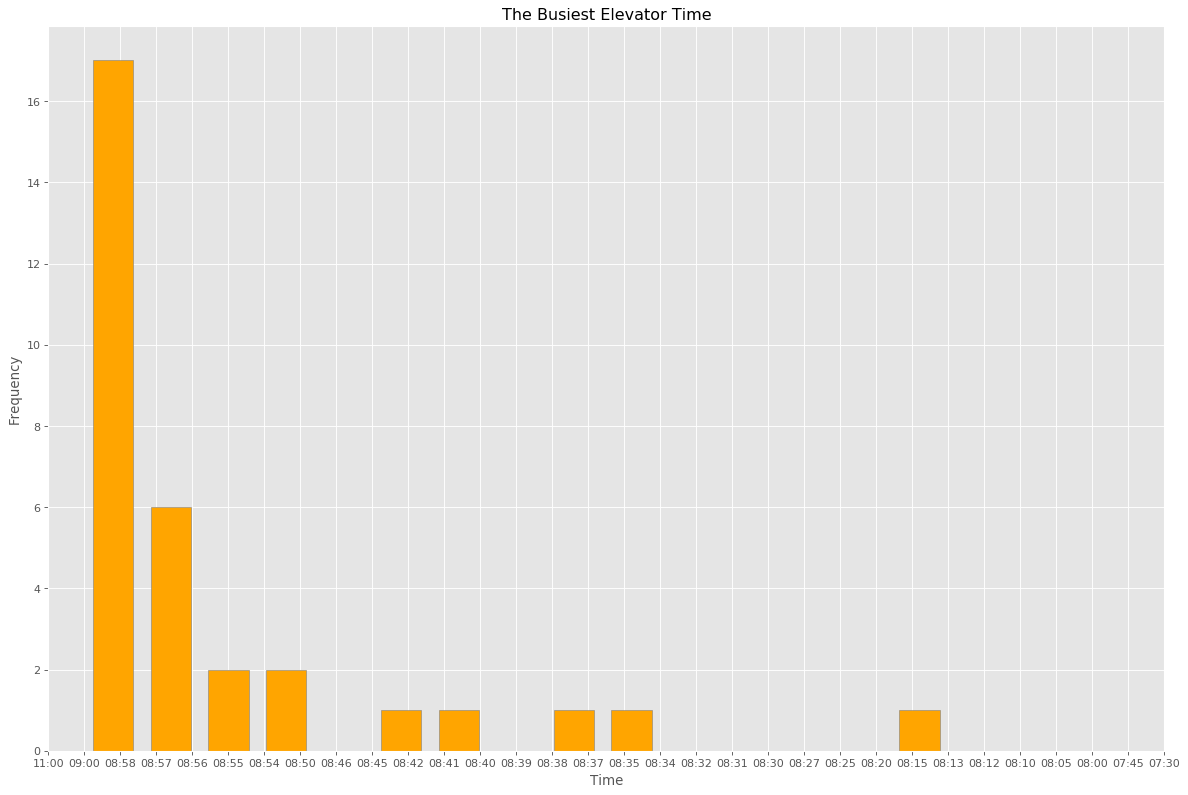

In [13]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18, 12), dpi=80)

ax.set_title('The Busiest Elevator Time')

ax.set_xlabel('Time')
ax.set_ylabel('Frequency')

_= ax.hist(time_count.values, bins=15, facecolor='orange', edgecolor='gray', rwidth=.7)

_= ax.set_xticklabels(time_count.index)
_= ax.set_xticks(range(0, len(time_count)))
